<a href="https://colab.research.google.com/github/mahhhdy/SBU_DataMining_Python/blob/main/SVM_Hard_margin_and_Soft_margin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# initial lib and chack for missing value 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from google.colab import drive

import missingno as msno  # check missing value

drive.mount('/content/drive')
path='/content/drive/MyDrive/DataSets/phone price prediction train.csv'

df=pd.read_csv(path)
print(df.shape)
df.columns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(2000, 21)


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Hard margin and Soft margin

In [23]:
data = pd.DataFrame(data=df, columns=['battery_power','ram'])
data['price_range']=df['price_range']
data.head()

,battery_power,ram,price_range
0,842,2549,1
1,1021,2631,2
2,563,2603,2
3,615,2769,2
4,1821,1411,1


In [24]:
data.price_range.replace({
    1:0,
    2:3
},inplace=True)

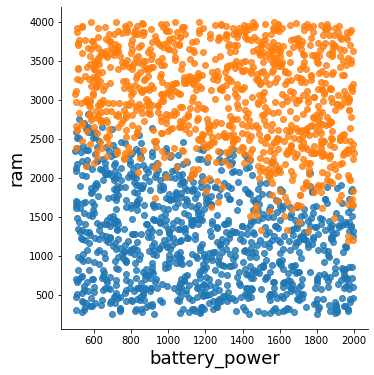

In [25]:
sns.lmplot(x='battery_power',y='ram',hue='price_range',data=data, fit_reg=False, legend=False)
# plt.legend(['Iris-Setosa','Iris-Versicolor'], fontsize = 14)
plt.xlabel('battery_power', fontsize = 18)
plt.ylabel('ram', fontsize = 18)
plt.show()

In [26]:
svc = LinearSVC(C=1000,loss="hinge")
svc.fit(data[['battery_power','ram']].values,data['price_range'].values)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

# feature engineering
binning the battery power feature with 3 unequal categories

In [27]:
df['battery_power'].describe()

count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

In [28]:
def binningBetteryPower(battery_power):
  if battery_power<=1000:
    return 'cat1'
  elif (battery_power>1000) & (battery_power<=1500):
    return 'cat2'
  elif (battery_power>1500):
    return 'cat3'

In [29]:
df['binning_bettery_power'] = df['battery_power'].apply(binningBetteryPower)

binning battery_power feature to 3 categores

In [32]:
df['binning_bettery_power'].unique()

array(['cat1', 'cat2', 'cat3'], dtype=object)